<a href="https://colab.research.google.com/github/Edrodriguezcarcamo/Ambito-Termico/blob/main/Ciclo_Rankine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install CoolProp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 45.0 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/CoolProp/Plots/Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/CoolProp/Plots/Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/CoolProp/Plots/Plots.py:301: UserWarning: You called the function "draw_process", which is not tested.
  warnings.warn("You called the function \"draw_process\", which is not tested.", UserWarning)
/usr/local/lib/python3.9/dist-packages/CoolProp/Plots/Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


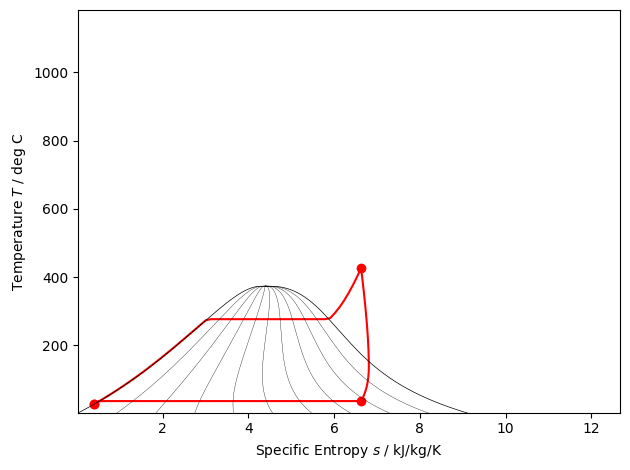

In [ ]:
import CoolProp
import matplotlib.pyplot as plt
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleRankineCycle


pp = PropertyPlot('HEOS::Water', 'TS', unit_system='EUR')
pp.calc_isolines(CoolProp.iQ, num=11)

cycle = SimpleRankineCycle('HEOS::Water', 'TS', unit_system='EUR')

T0 = 300
pp.state.update(CoolProp.QT_INPUTS,0.0,T0+10)
p0 = pp.state.keyed_output(CoolProp.iP)

T2 = 700
pp.state.update(CoolProp.QT_INPUTS,1.0,T2-150)
p2 = pp.state.keyed_output(CoolProp.iP)

cycle.simple_solve(T0, p0, T2, p2, 1, 1, SI=True)
cycle.steps = 50

sc = cycle.get_state_changes()
pp.draw_process(sc)

plt.close(cycle.figure)
pp.show()

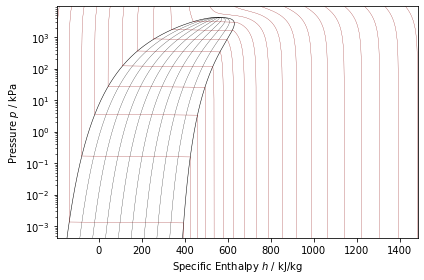

In [ ]:
from CoolProp.Plots import PropertyPlot
plot = PropertyPlot('R290', 'Ph')
plot.calc_isolines(CoolProp.iQ, num=10)
plot.calc_isolines(CoolProp.iT, num=20)
plot.show()